In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Display the first few rows to understand its structure
ds=pd.read_csv('Data-Science-Job_Listing.csv')
ds.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


 ## Step 2: Explore and Clean the Dataset Explore the columns available to understand what insights can be derived. You might want to check for missing values, data types, and overall quality of the data:

In [19]:
ds.columns

Index(['Position', 'Job Title', 'Company Name', 'Location', 'Salary', 'Date',
       'Logo', 'Job Link', 'Company Rating'],
      dtype='object')

In [20]:
ds.isnull().sum()

Position           0
Job Title          0
Company Name       0
Location           0
Salary            62
Date               0
Logo              64
Job Link           0
Company Rating    61
dtype: int64

In [21]:
# Forward fill
ds['Salary'] = ds['Salary'].fillna(method='ffill')

# Backward fill
ds['Company Rating'] = ds['Company Rating'].fillna(method='bfill')

C:\Users\arunb\AppData\Local\Temp\ipykernel_1816\3466846986.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds['Salary'] = ds['Salary'].fillna(method='ffill')
C:\Users\arunb\AppData\Local\Temp\ipykernel_1816\3466846986.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds['Company Rating'] = ds['Company Rating'].fillna(method='bfill')


In [23]:
# Impute missing values in the Logo column with the mode
ds['Logo'] = ds['Logo'].fillna(ds['Logo'].mode()[0])

In [25]:
ds.isnull().sum()

Position          0
Job Title         0
Company Name      0
Location          0
Salary            0
Date              0
Logo              0
Job Link          0
Company Rating    0
dtype: int64

## Trend Analysis Top Job Titles Identify the most common job titles and visualize their frequencies:

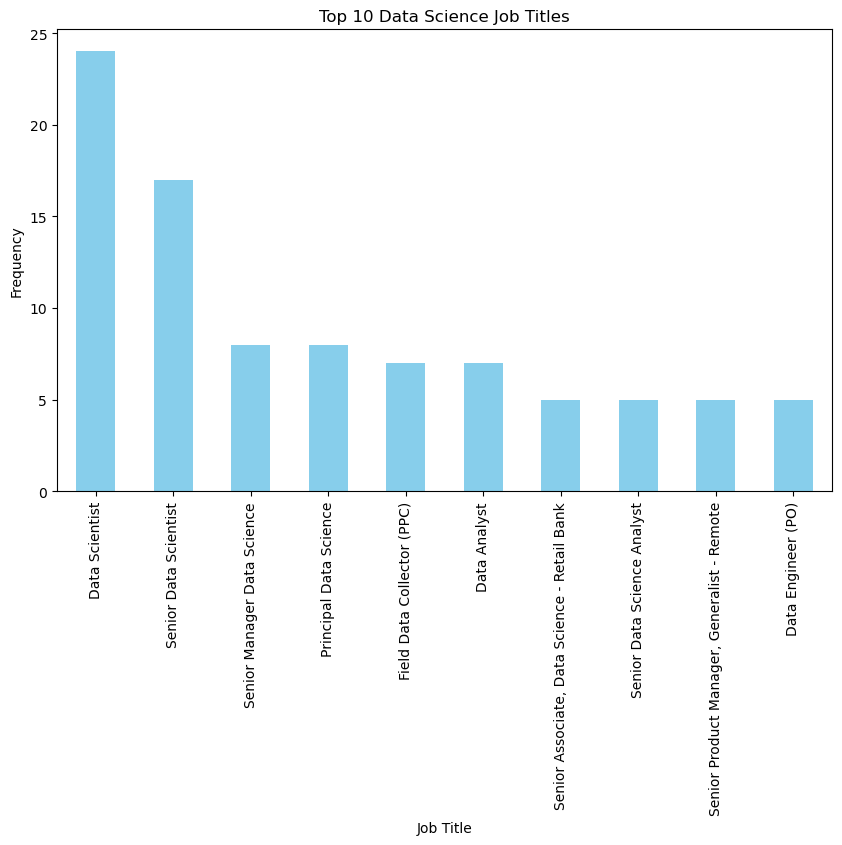

In [28]:
import matplotlib.pyplot as plt

# Count the occurrences of each job title
job_title_counts = ds['Job Title'].value_counts().head(10)

# Plot the top 10 job titles
plt.figure(figsize=(10,6))
job_title_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Data Science Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


## Locations with Most Job Listings Analyze which locations have the highest number of data science job openings:

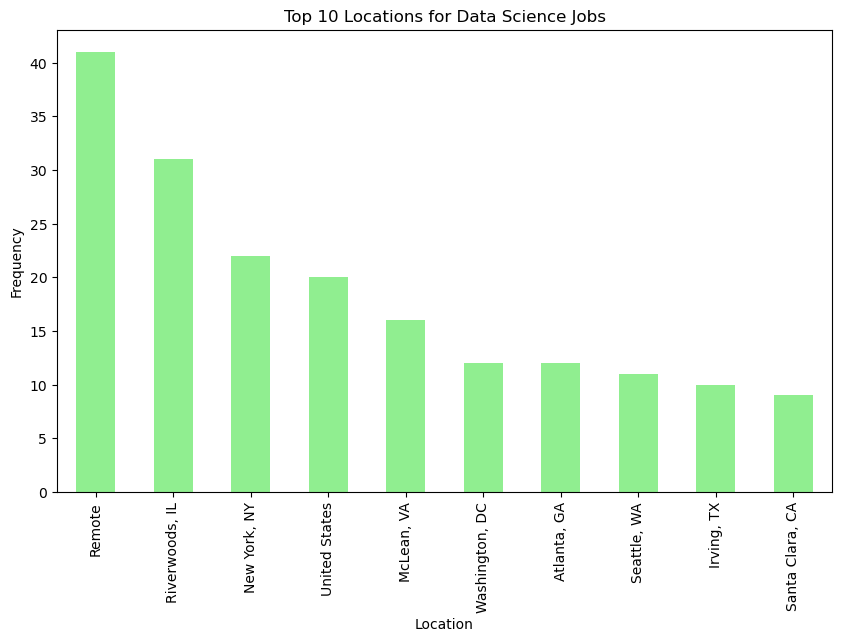

In [31]:
# Count the occurrences of each location
location_counts = ds['Location'].value_counts().head(10)

# Plot the top 10 locations
plt.figure(figsize=(10,6))
location_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Locations for Data Science Jobs')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

## Monthly Job Posting Trends Determine the most active months for job postings:

In [38]:
import re
from datetime import datetime, timedelta

In [40]:
# Function to convert relative dates to actual dates
def convert_relative_date(date_str):
    match = re.match(r'(\d+)d\+', date_str)
    if match:
        days_ago = int(match.group(1))
        return datetime.now() - timedelta(days=days_ago)
    return None

# Apply the function to the Date column
ds['Posting Date'] = ds['Date'].apply(convert_relative_date)

C:\Users\arunb\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


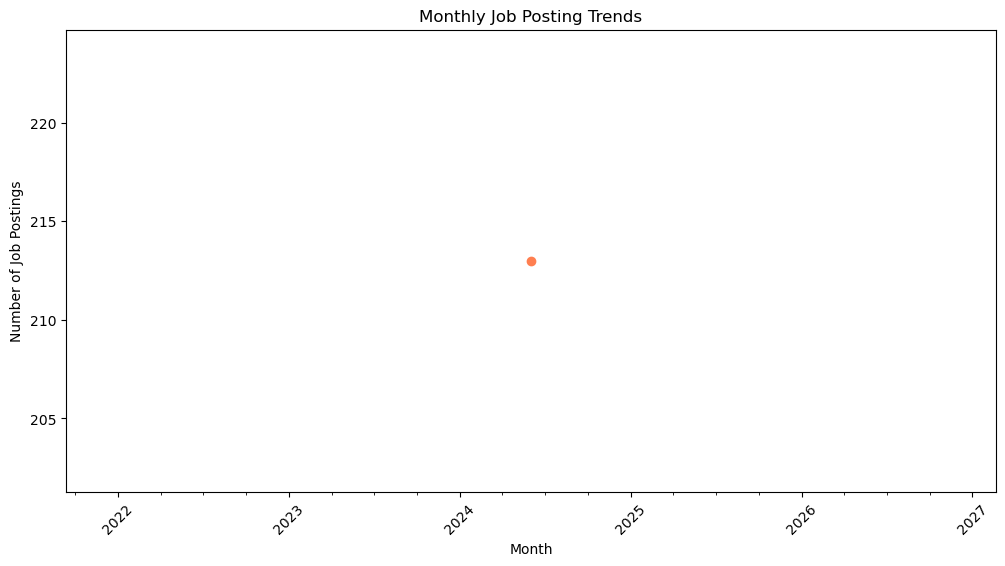

In [42]:
# Convert 'Posting Date' to datetime
ds['Posting Date'] = pd.to_datetime(ds['Posting Date'])

# Extract month and year from 'Posting Date'
ds['Month'] = ds['Posting Date'].dt.to_period('M')

# Count the number of job postings per month
monthly_postings = ds['Month'].value_counts().sort_index()

# Plot the monthly job posting trends
plt.figure(figsize=(12,6))
monthly_postings.plot(kind='line', marker='o', color='coral')
plt.title('Monthly Job Posting Trends')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

## Salary Analysis Salary Distribution by Job Title Examine the distribution of salaries across different job titles

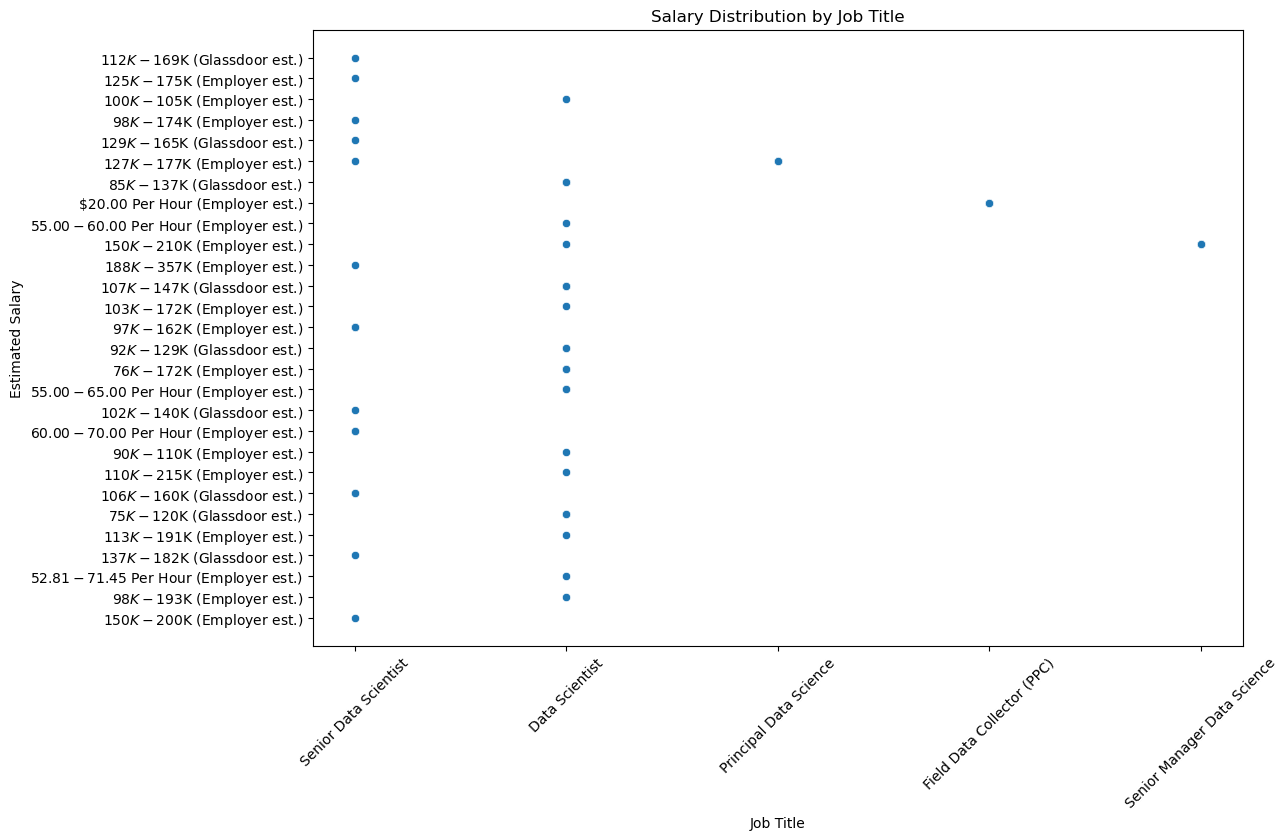

In [45]:
import seaborn as sns

# Filter dataset to include only job titles with sufficient data
top_titles = ds['Job Title'].value_counts().head(5).index
df_filtered = ds[ds['Job Title'].isin(top_titles)]

# salary distribution by job title
plt.figure(figsize=(12,8))
sns.scatterplot(x='Job Title', y='Salary', data=df_filtered)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Estimated Salary')
plt.xticks(rotation=45)
plt.show()

## Company Analysis Company Ratings vs Job Listings Investigate the relationship between company ratings and the number of job listings

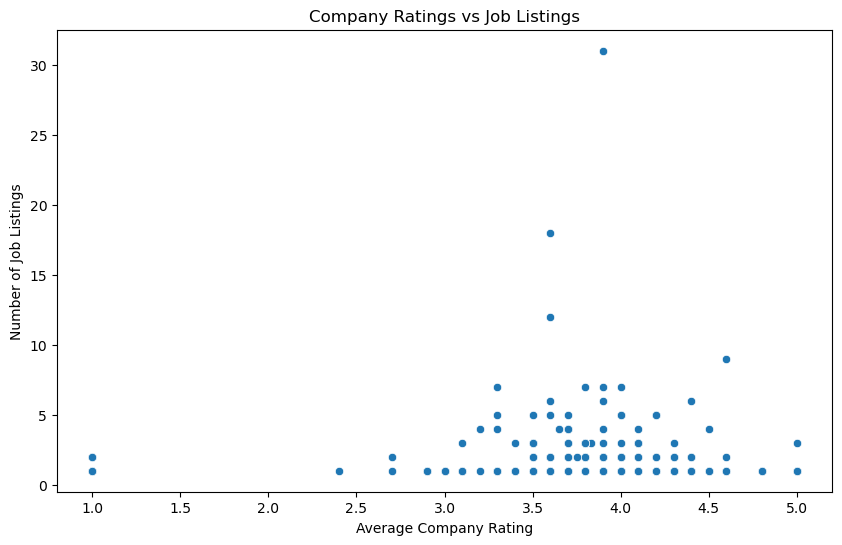

In [47]:
# Calculate average rating per company
company_ratings = ds.groupby('Company Name')['Company Rating'].mean()
job_counts = ds['Company Name'].value_counts()

# Merge data
ratings_vs_jobs = pd.DataFrame({'Average Rating': company_ratings, 'Job Listings': job_counts})
ratings_vs_jobs = ratings_vs_jobs.dropna()

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Average Rating', y='Job Listings', data=ratings_vs_jobs)
plt.title('Company Ratings vs Job Listings')
plt.xlabel('Average Company Rating')
plt.ylabel('Number of Job Listings')
plt.show()


In [50]:
import joblib

In [52]:
joblib.dump(model,'Data-Science-Job_Listing.pkl')

['Data-Science-Job_Listing.pkl']

In [54]:
from flask import Flask
from flask import render_template
import joblib
from flask import request

In [56]:
app=Flask(__name__)
model=joblib.load('Data-Science-Job_Listing.pkl')
@app.route('/')
def hello(name=None):
    return render_template('index.html',name=name)

@app.route('/result',methods=['GET','POST'])
def get_value():
 if request.method=="POST":
    tdsj=string(request.form.get('tdsj'))
    loc=int(request.form.get('loc'))
    sal=int(request.form.get('sal'))
    predict=model.predict([[tdsj,loc,sal]])
    print(predict[0])

 return render_template('results.html',prediction=[predict[0]])
    

In [ ]:
if __name__=="__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
